## 상관관계
- 두 변수간 관계성 강도 측정 통계지표
- -1 < 0 < 1 (기준 : 0.5)
    * 1 : 양에 관계로 깊다
    * 0 : 관계 없다
    * -1 : 음에 관계로 있다.

### 간단한 예정

In [1]:
import pandas as pd

# 두 변수 데이터 (예: 주식 A와 주식 B의 일간 수익률) 

data = { 'Stock_A': [0.02, 0.01, -0.01, 0.03, -0.02], 'Stock_B': [0.01, 0.03, -0.02, 0.04, -0.01] }

df_first = pd.DataFrame(data)
df_first

,Stock_A,Stock_B
0,0.02,0.01
1,0.01,0.03
2,-0.01,-0.02
3,0.03,0.04
4,-0.02,-0.01


In [2]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Stock_A  5 non-null      float64
 1   Stock_B  5 non-null      float64
dtypes: float64(2)
memory usage: 212.0 bytes


In [3]:
df_first.corr()

,Stock_A,Stock_B
Stock_A,1.00000,0.85118
Stock_B,0.85118,1.00000


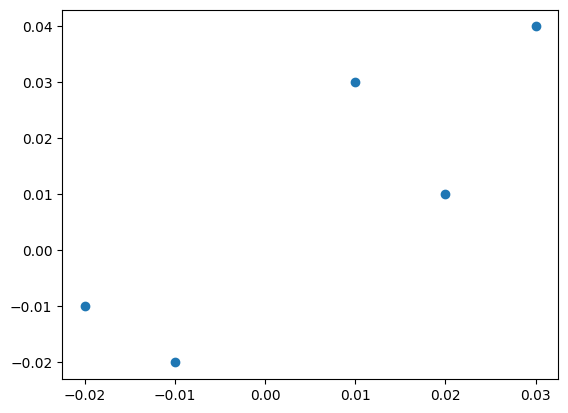

In [4]:
import matplotlib.pyplot as plt

plt.scatter(df_first['Stock_A'], df_first['Stock_B'])
plt.show()

### 실 주식 데이터 상관관계 확인

In [5]:
# 개별 종목 데이터: 국내외 심볼 혼합 
stocks = { 
          'S&P500': 'S&P500', # S&P500
          'AAPL': 'Apple (US)', # 애플 (미국)
          'MSFT': 'Microsoft (US)', # 마이크로소프트 (미국)
          '005930': 'Samsung (KR)', # 삼성전자 (한국)
          '000660': 'SK Hynix (KR)'   # SK하이닉스 (한국) 
          }

In [6]:
import FinanceDataReader as fdr

In [7]:
start_day ='2023'
df_sp500 = fdr.DataReader('S&P500', start_day)
df_msft = fdr.DataReader('MSFT', start_day)
df_skhynix = fdr.DataReader('000660', start_day)

In [8]:
# 각 정보확인
# df_sp500.info()   # 499
# df_msft.info()    # 499
df_skhynix.info() # 488

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 517 entries, 2023-01-02 to 2025-02-14
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    517 non-null    int64  
 1   High    517 non-null    int64  
 2   Low     517 non-null    int64  
 3   Close   517 non-null    int64  
 4   Volume  517 non-null    int64  
 5   Change  517 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 28.3 KB


In [18]:
# df_sp500[['Close']] # Dataframe
df_sp500_close = df_sp500[['Close']].rename(columns={'Close':'SP500'}) # 새로운 이름지정 할때 rename(columns={ : }) 사용
df_sp500_close

,SP500
2023-01-03,3824.139893
2023-01-04,3852.969971
2023-01-05,3808.100098
2023-01-06,3895.080078
2023-01-09,3892.090088
...,...
2025-02-07,6025.990234
2025-02-10,6066.439941
2025-02-11,6068.500000
2025-02-12,6051.970215


In [10]:
df_msft_close = df_msft[['Close']].rename(columns={'Close':'MSFT'})

In [11]:
df_skhynix_close = df_skhynix[['Close']].rename(columns={'Close':'SKhynix'})

In [12]:
# 도중 추가해서 비교하기 위해 추가가
df_samsung = fdr.DataReader('005930', start_day)
df_samsung_close = df_samsung[['Close']].rename(columns={'Close':'Samsung'})

In [13]:
df_corr = pd.concat([df_sp500_close, df_msft_close, df_skhynix_close,df_samsung_close], axis = 1)
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 550 entries, 2023-01-02 to 2025-02-14
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SP500    531 non-null    float64
 1   MSFT     531 non-null    float64
 2   SKhynix  517 non-null    float64
 3   Samsung  517 non-null    float64
dtypes: float64(4)
memory usage: 21.5 KB


In [ ]:
df_corr.dropna(inplace=True)

# inplace=True는 원본 DataFrame을 직접 수정하겠다는 의미

In [15]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 498 entries, 2023-01-03 to 2025-02-13
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SP500    498 non-null    float64
 1   MSFT     498 non-null    float64
 2   SKhynix  498 non-null    float64
 3   Samsung  498 non-null    float64
dtypes: float64(4)
memory usage: 19.5 KB


In [ ]:
correlation_matrix = df_corr.corr()
correlation_matrix

# df_corr.corr()는 df_corr 데이터프레임에서 각 열(특징) 간의 상관계수(correlation coefficient)를 계산하는 함수입니다.
# 상관계수는 두 변수 간의 관계 강도를 측정하는 값으로, -1에서 1 사이의 값으로 나타납니다.

# 1: 완전한 양의 상관관계 (두 변수는 동일하게 변함)
# -1: 완전한 음의 상관관계 (한 변수가 증가할 때 다른 변수는 감소)
# 0: 상관관계 없음 (두 변수 간의 변화가 서로 관련이 없음)
# 각 변수의 상관계수는 두 변수 간의 선형 관계를 측정합니다.

,SP500,MSFT,SKhynix,Samsung
SP500,1.000000,0.902383,0.896630,-0.083830
MSFT,0.902383,1.000000,0.919034,0.265676
SKhynix,0.896630,0.919034,1.000000,0.250298
Samsung,-0.083830,0.265676,0.250298,1.000000


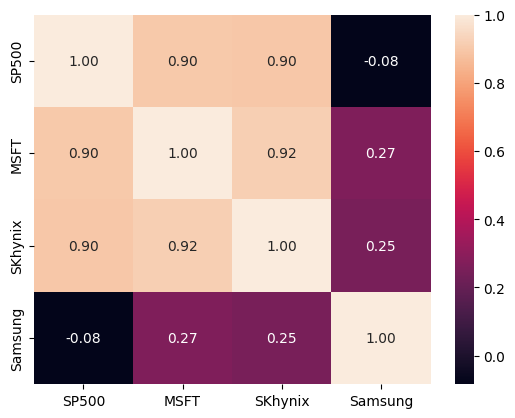

In [ ]:
import seaborn as sns

# sns.heatmap(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, fmt = '.2f') 

plt.show()

# sns.heatmap(): seaborn의 히트맵 함수로, 2D 데이터를 시각적으로 표현하는 데 사용됩니다.
# 히트맵은 값을 색상으로 시각화하여, 데이터의 패턴을 쉽게 파악할 수 있게 도와줍니다.

# correlation_matrix: 이 매개변수는 상관 행렬을 의미합니다. 상관 행렬을 히트맵으로 시각화합니다.

# annot=True: True로 설정하면 각 셀에 상관계수 값을 숫자로 표시합니다.

# 예: 셀 안에 0.85, -0.3과 같은 숫자가 표시됩니다.
# fmt='.2f': 숫자의 표시 형식을 지정합니다. '.2f'는 소수점 이하 두 자릿수로 숫자를 표시한다는 의미입니다. 예를 들어 0.855는 0.86으로 표시됩니다.